In [1]:
#!pip install matplotlib

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
train_df = pd.read_csv('/opt/ml/FLUE/level2_klue_nlp-level2-nlp-11/notebook/flue_train_data.csv')

In [23]:
train_df.dtypes

Unnamed: 0         int64
document_id       object
sentence          object
subject_entity    object
object_entity     object
label             object
dtype: object

In [24]:
train_df.head()

,Unnamed: 0,document_id,sentence,subject_entity,object_entity,label
0,0,a.vUdBGp.IutKpqRl8aIQPmMcw88-1_570.txt,"지형은 남쪽에서 북쪽으로 갈수록 차츰 낮아지며, 알프스 지대·중앙 구릉 지대·북부 ...","{'word': '4대 자연 구역', 'start_idx': 10782, 'end_...","{'word': '북부 독일평야', 'start_idx': 10773, 'end_i...",no_relation
1,1,a.vUdBGp.IutKpqRl8aIQPmMcw88-1_570.txt,"지형은 남쪽에서 북쪽으로 갈수록 차츰 낮아지며, 알프스 지대·중앙 구릉 지대·북부 ...","{'word': '4대 자연 구역', 'start_idx': 10782, 'end_...","{'word': '중앙 구릉 지대', 'start_idx': 10764, 'end_...",no_relation
2,2,a.vUdBGp.IutKpqRl8aIQPmMcw88-1_570.txt,"지형은 남쪽에서 북쪽으로 갈수록 차츰 낮아지며, 알프스 지대·중앙 구릉 지대·북부 ...","{'word': '4대 자연 구역', 'start_idx': 10782, 'end_...","{'word': '알프스 지대', 'start_idx': 10757, 'end_id...",no_relation
3,3,a.vUdBGp.IutKpqRl8aIQPmMcw88-1_570.txt,독일은 2차세계대전 (나치독일) 당시에 세계 최초의 순항미사일 V-1 로켓과 세계 ...,"{'word': '순항미사일', 'start_idx': 13322, 'end_idx...","{'word': 'V-1 로켓', 'start_idx': 13328, 'end_id...",no_relation
4,4,a.vUdBGp.IutKpqRl8aIQPmMcw88-1_570.txt,독일은 2차세계대전 (나치독일) 당시에 세계 최초의 순항미사일 V-1 로켓과 세계 ...,"{'word': '탄도 미사일', 'start_idx': 13343, 'end_id...","{'word': 'V-2 로켓', 'start_idx': 13350, 'end_id...",no_relation


In [25]:
#train_label 별 개수 확인인
group = train_df['label'].value_counts()
group

no_relation                             617
competition:year                        133
competition:place                        50
country:game_results                     48
org:alternative_name                     40
parent relationship:sub relationship     40
country:faced_country                    28
org:country_of_headquarters              25
country:year_of_victory                  12
country:population                        6
country:number_of_wins                    6
country:soccer_player                     3
Name: label, dtype: int64

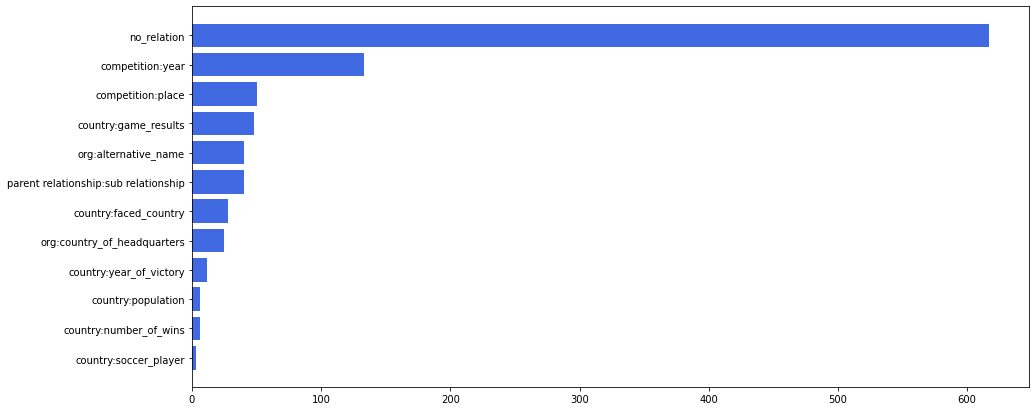

In [26]:
#간단한 비율 확인 EDA
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
axes.barh(group.index[::-1], group[::-1],color='royalblue')

plt.show()

In [34]:
#train라벨별 추출할 valid 개수 계산
valid_count = {}
valid_ratio = 0.2
for x, y in group.items() :
  print(f'{x:40} : {y:5},  ratio : {y / len(train_df) : .5f} , valid_count :  { int(int(len(train_df) * valid_ratio) * (y / len(train_df)))} ' )
  valid_count[x] = int(int(1008 * 0.2) * (y / len(train_df)))

no_relation                              :   617,  ratio :  0.61210 , valid_count :  123 
competition:year                         :   133,  ratio :  0.13194 , valid_count :  26 
competition:place                        :    50,  ratio :  0.04960 , valid_count :  9 
country:game_results                     :    48,  ratio :  0.04762 , valid_count :  9 
org:alternative_name                     :    40,  ratio :  0.03968 , valid_count :  7 
parent relationship:sub relationship     :    40,  ratio :  0.03968 , valid_count :  7 
country:faced_country                    :    28,  ratio :  0.02778 , valid_count :  5 
org:country_of_headquarters              :    25,  ratio :  0.02480 , valid_count :  4 
country:year_of_victory                  :    12,  ratio :  0.01190 , valid_count :  2 
country:population                       :     6,  ratio :  0.00595 , valid_count :  1 
country:number_of_wins                   :     6,  ratio :  0.00595 , valid_count :  1 
country:soccer_player        

In [35]:
print(valid_count)

{'no_relation': 123, 'competition:year': 26, 'competition:place': 9, 'country:game_results': 9, 'org:alternative_name': 7, 'parent relationship:sub relationship': 7, 'country:faced_country': 5, 'org:country_of_headquarters': 4, 'country:year_of_victory': 2, 'country:population': 1, 'country:number_of_wins': 1, 'country:soccer_player': 0}


In [36]:
#추출전 데이터 shuffle
train_df = train_df.sample(frac=1)

In [37]:
#새로운 dataFrame 정의의
new_valid_df = pd.DataFrame(columns=['document_id','sentence','subject_entity','object_entity','label'])
new_train_df = pd.DataFrame(columns=['document_id','sentence','subject_entity','object_entity','label'])
for idx, item in train_df.iterrows():
  #print(item['id'], item['label'])
  if valid_count[item['label']] > 0 :
    valid_count[item['label']] = valid_count[item['label']] - 1
    new_valid_df.loc[idx]=item
  else :
    new_train_df.loc[idx]=item

In [38]:
#새로운 train_df, valid_df 길이 계산
print( f'train_df len : {len(new_train_df)}')
print( f'valid_df len ; {len(new_valid_df)}')

train_df len : 814
valid_df len ; 194


In [39]:
#dict 타입 변수에 저장한 데이터 전부 추출되었는지 확인
print(valid_count)
sum(valid_count.values())

{'no_relation': 0, 'competition:year': 0, 'competition:place': 0, 'country:game_results': 0, 'org:alternative_name': 0, 'parent relationship:sub relationship': 0, 'country:faced_country': 0, 'org:country_of_headquarters': 0, 'country:year_of_victory': 0, 'country:population': 0, 'country:number_of_wins': 0, 'country:soccer_player': 0}


0

In [43]:
#train_ valid id types 변경
new_valid_df = new_valid_df.astype({'document_id':'str'})
new_train_df = new_train_df.astype({'document_id':'str'})

In [44]:
new_train_df.dtypes

document_id       object
sentence          object
subject_entity    object
object_entity     object
label             object
dtype: object

In [45]:
new_valid_df.dtypes

document_id       object
sentence          object
subject_entity    object
object_entity     object
label             object
dtype: object

In [46]:
new_train_df.head()

,document_id,sentence,subject_entity,object_entity,label
148,a.vUdBGp.IutKpqRl8aIQPmMcw88-1_570.txt,"독일 축구 국가대표팀은 1954년, 1974년, 1990년, 2014년 FIFA 월...","{'word': '독일', 'start_idx': 27037, 'end_idx': ...","{'word': '1954년', 'start_idx': 27050, 'end_idx...",country:year_of_victory
305,a8x9sfUJCJjdetRM9Gdo2ickz0fi-이탈리아.txt,이탈리아는 영국으로부터 대략 19세기 말쯤 축구를 받아들였는데 영국과 독일 스페인과...,"{'word': '이탈리아', 'start_idx': 38915, 'end_idx'...","{'word': '2006년', 'start_idx': 39010, 'end_idx...",country:year_of_victory
302,a8x9sfUJCJjdetRM9Gdo2ickz0fi-이탈리아.txt,이탈리아는 영국으로부터 대략 19세기 말쯤 축구를 받아들였는데 영국과 독일 스페인과...,"{'word': '이탈리아', 'start_idx': 38915, 'end_idx'...","{'word': '1934년', 'start_idx': 38985, 'end_idx...",country:year_of_victory
172,a.vUdBGp.IutKpqRl8aIQPmMcw88-1_570.txt,대한민국의 V-리그도 리그전 방식을 사용한다.,"{'word': 'V-리그', 'start_idx': 33992, 'end_idx'...","{'word': '대한민국', 'start_idx': 33986, 'end_idx'...",org:country_of_headquarters
150,a.vUdBGp.IutKpqRl8aIQPmMcw88-1_570.txt,"독일 축구 국가대표팀은 1954년, 1974년, 1990년, 2014년 FIFA 월...","{'word': '독일', 'start_idx': 27037, 'end_idx': ...","{'word': '1990년', 'start_idx': 27064, 'end_idx...",country:year_of_victory


In [47]:
new_valid_df.head()

,document_id,sentence,subject_entity,object_entity,label
725,aTzoyXPQYyGdxZ26jCPxhPAWToRW-571_1140.txt,4강전에서 와 의 경기에서 1-1로 동점을 이루자 승부차기 4-3으로 아르헨티나가 ...,"{'word': '아르헨티나', 'start_idx': 30250, 'end_idx...","{'word': '결승전에 진출', 'start_idx': 30257, 'end_i...",country:game_results
94,a.vUdBGp.IutKpqRl8aIQPmMcw88-1_570.txt,"독일의 르네상스기에는 알브레히트 뒤러, 한스 홀바인, 마티아스 그뤼네발트, 루카스 ...","{'word': '독일', 'start_idx': 24220, 'end_idx': ...","{'word': '루벤스', 'start_idx': 24295, 'end_idx':...",no_relation
978,aXHwzWmvaNXjhbrsM0rJr0HrSdj0-1141_1710.txt,"이토록 번영한 로마 제국마저 쇠퇴의 흐름을 피할 수 없었기에, 기원후 300년 경에...","{'word': '로물루스 아우구스투스', 'start_idx': 29411, 'e...","{'word': '로마', 'start_idx': 29282, 'end_idx': ...",no_relation
554,aRGw3EcUy1VJbMWsOhc2nNHLdUhe-2281_2852.txt,"일반적으로 유럽의 5대 리그로 불리는 스페인 프리메라리가, 이탈리아 세리에 A, 잉...","{'word': '프리메라 디비시온', 'start_idx': 3303, 'end_...","{'word': '아르헨티나', 'start_idx': 3297, 'end_idx'...",org:country_of_headquarters
820,aXHwzWmvaNXjhbrsM0rJr0HrSdj0-1141_1710.txt,"고대 올림픽의 종목으로는 육상, 5종 경기(원반던지기, 창던지기, 달리기, 레슬링,...","{'word': '고대 올림픽의 종목', 'start_idx': 3339, 'end...","{'word': '복싱', 'start_idx': 3393, 'end_idx': 3...",no_relation


In [48]:
#중복 index 확인
train_id = new_train_df['id'].tolist()
valid_id = new_valid_df['id'].tolist()

print("중복인덱스 확인 : " , len(set(train_id) & set(valid_id)) == 0 )
print("총개수 확인 :" , (len(train_id) + len(valid_id)) == len(train_df) ) #train_df와 개수 같은지 확인


KeyError: 'id'

In [49]:
#새로운 train 라벨별 개수 확인
new_train_group = new_train_df['label'].value_counts()
new_train_group

no_relation                             494
competition:year                        107
competition:place                        41
country:game_results                     39
org:alternative_name                     33
parent relationship:sub relationship     33
country:faced_country                    23
org:country_of_headquarters              21
country:year_of_victory                  10
country:number_of_wins                    5
country:population                        5
country:soccer_player                     3
Name: label, dtype: int64

In [50]:
#새로운 valid 라벨별 개수 확인
new_valid_group = new_valid_df['label'].value_counts()
new_valid_group

no_relation                             123
competition:year                         26
country:game_results                      9
competition:place                         9
org:alternative_name                      7
parent relationship:sub relationship      7
country:faced_country                     5
org:country_of_headquarters               4
country:year_of_victory                   2
country:number_of_wins                    1
country:population                        1
Name: label, dtype: int64

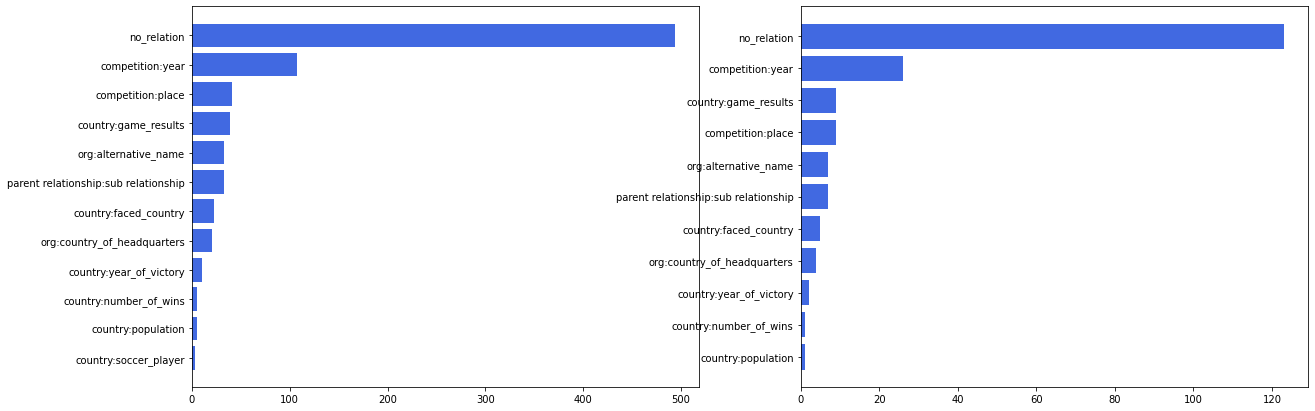

In [51]:
#새로운 train , valid 비율 EDA
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].barh(new_train_group.index[::-1], new_train_group[::-1],color='royalblue')
axes[1].barh(new_valid_group.index[::-1], new_valid_group[::-1],color='royalblue')
plt.show()

In [52]:
#csv 파일저장 , index 제거 및 utf-8 encoding
new_train_df.to_csv('./new_train.csv',index=False, encoding = 'utf-8')
new_valid_df.to_csv('./new_valid.csv',index=False, encoding = 'utf-8')

In [63]:
list(set(train_df['label']))

['country:year_of_victory',
 'no_relation',
 'country:faced_country',
 'competition:year',
 'country:population',
 'country:number_of_wins',
 'country:soccer_player',
 'org:alternative_name',
 'parent relationship:sub relationship',
 'country:game_results',
 'org:country_of_headquarters',
 'competition:place']

In [64]:
lst = ['country:year_of_victory',
 'no_relation',
 'country:faced_country',
 'competition:year',
 'country:population',
 'country:number_of_wins',
 'country:soccer_player',
 'org:alternative_name',
 'parent relationship:sub relationship',
 'country:game_results',
 'org:country_of_headquarters',
 'competition:place']

In [67]:
my_dict = {}
for i,v in enumerate(lst):
    my_dict[v] = i

In [68]:
my_dict

{'country:year_of_victory': 0,
 'no_relation': 1,
 'country:faced_country': 2,
 'competition:year': 3,
 'country:population': 4,
 'country:number_of_wins': 5,
 'country:soccer_player': 6,
 'org:alternative_name': 7,
 'parent relationship:sub relationship': 8,
 'country:game_results': 9,
 'org:country_of_headquarters': 10,
 'competition:place': 11}